In [ ]:
import tweepy
import pandas as pd
import numpy as np
import re
from nltk.tokenize import TweetTokenizer

In [ ]:
access_key = "1242513200861655044-6CI2xllf2c4ajWcWhxTaXPDHk3jr6a"
access_secret = "sw1LYhAV6WQncMgrbmE8uEKWBggxWnFftaPxSbkaXhMvJ"

In [ ]:
#twiiter authentication
auth = tweepy.OAuthHandler(consumer_key="7UJbJE9RyNsdHXGctbkqiEM6B", consumer_secret="pc5apOR0d5BZeYim4thjAlkokgxLyeKNlXHnHHlGf0p46dwNeK")
auth.set_access_token(access_key, access_secret)
#creating an API object
api = tweepy.API(auth)

In [ ]:
#'sustainability'or'carbon emission'or'green house gas'or'ghg'or'cost-effectiveness'or'carbon footprint'or'carbon neutrality', 'methane'

In [ ]:
search_term = "exxonmobil, 'sustainability' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(5000)

sustai_twt = [tweet.text for tweet in tweets]

len(sustai_twt)

11

In [ ]:
search_term = "exxonmobil, 'carbon' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

em_twt = [tweet.text for tweet in tweets]

em_twt[0:5]
len(em_twt)

40

In [ ]:
search_term = "exxonmobil, 'methane' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

mthn_twt = [tweet.text for tweet in tweets]

len(mthn_twt)

7

In [ ]:
search_term = "exxonmobil, 'ghg' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

ghg_twt = [tweet.text for tweet in tweets]

ghg_twt[0:5]
len(ghg_twt)

2

In [ ]:
search_term = "exxonmobil, 'carbon footprint' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

cm_twt = [tweet.text for tweet in tweets]

cm_twt[0:5]
len(em_twt)

40

In [ ]:
search_term = "exxonmobil, 'energy' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2015-11-01').items(1000)

enrg_twt = [tweet.text for tweet in tweets]

enrg_twt[0:5]
len(enrg_twt)

122

In [ ]:
search_term = "exxonmobil, 'net zero' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

nz_twt = [tweet.text for tweet in tweets]

nz_twt[0:5]
len(nz_twt)

8

In [ ]:
search_term = "exxonmobil, 'plastic' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

pls_twt = [tweet.text for tweet in tweets]

pls_twt[0:5]
len(pls_twt)

7

In [ ]:
search_term = "exxonmobil, 'Polyethylene' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

pol_twt = [tweet.text for tweet in tweets]

pol_twt[0:5]
len(pol_twt)

3

In [ ]:
search_term = "exxonmobil, 'light' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(5000)

lig_twt = [tweet.text for tweet in tweets]

len(lig_twt)

2

In [ ]:
df = pd.DataFrame(data = sustai_twt,columns = ['Tweet'])
df1 = pd.DataFrame(data = em_twt,columns = ['Tweet'])
df2 = pd.DataFrame(data = mthn_twt,columns = ['Tweet'])
df3 = pd.DataFrame(data = ghg_twt,columns = ['Tweet'])
df4 = pd.DataFrame(data = cm_twt,columns = ['Tweet'])
df5 = pd.DataFrame(data = enrg_twt,columns = ['Tweet'])
df6 = pd.DataFrame(data = nz_twt,columns = ['Tweet'])
df7 = pd.DataFrame(data = pls_twt,columns = ['Tweet'])
df8 = pd.DataFrame(data = pol_twt,columns = ['Tweet'])

In [ ]:
final_df = pd.concat([df,df1,df2,df3,df4,df5,df6,df7,df8],axis = 0)

In [ ]:
final_df

,Tweet
0,"""The pair is part of a team dedicated to reduc..."
1,ESG could be broken up so ratings instead focu...
2,#ExxonMobilSG is honored to take part in #Ente...
3,@BastardGrimm @CalVolunteers @JenSiebelNewsom ...
4,@AmericanrealA2 @CalVolunteers @JenSiebelNewso...
...,...
5,@exxonmobil_ind So when are you stopping your ...
6,37% of ExxonMobil Shareholders Support Studyin...
0,Extend the limits of stiffness and toughness o...
1,It’s time to rethink #filmdesign with Exceed™ ...


### Preprocessing


In [ ]:
#Lowercase
final_df['Tweet'] = final_df.Tweet.str.lower()

In [ ]:
#URL links
final_df.Tweet = final_df.Tweet.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))

In [ ]:
final_df.Tweet = final_df.Tweet.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

In [ ]:
#Placeholders link&videos
final_df.Tweet = final_df.Tweet.apply(lambda x: re.sub(r'{link}', '', x))
final_df.Tweet = final_df.Tweet.apply(lambda x: re.sub(r"\[video\]", '', x))

In [ ]:
#HTML reference characters
final_df.Tweet = final_df.Tweet.apply(lambda x: re.sub(r'&[a-z]+;', '', x))

In [ ]:
#remove @mentions
final_df.Tweet = final_df.Tweet.apply(lambda x:re.sub("@[A-Za-z0-9_]+","",x))


In [ ]:
#remove #hashtags
final_df.Tweet = final_df.Tweet.apply(lambda x:re.sub("#[A-Za-z0-9_]+","",x))


In [ ]:
#Non-letter characters
final_df.Tweet = final_df.Tweet.apply(lambda x: re.sub(r"[^a-z\s\(\-\:\)\\\/\];='#]", '', x))

In [ ]:
final_df

,Tweet
0,the pair is part of a team dedicated to reduce...
1,esg could be broken up so ratings instead focu...
2,is honored to take part in 's sustainability ...
3,exxon disagrees:
4,i beg to differ:\n
...,...
5,so when are you stopping your greenwashing a...
6,of exxonmobil shareholders support studying r...
0,extend the limits of stiffness and toughness o...
1,its time to rethink with exceed s performance...


In [ ]:
#drop duplicated
final_df.drop_duplicates(inplace=True)

In [ ]:
final_df

,Tweet
0,the pair is part of a team dedicated to reduce...
1,esg could be broken up so ratings instead focu...
2,is honored to take part in 's sustainability ...
3,exxon disagrees:
4,i beg to differ:\n
...,...
5,so when are you stopping your greenwashing a...
6,of exxonmobil shareholders support studying r...
0,extend the limits of stiffness and toughness o...
1,its time to rethink with exceed s performance...


### Sentiment Analyse

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.3 MB/s 


In [ ]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
final_df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in final_df["Tweet"]]
final_df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in final_df["Tweet"]]
final_df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in final_df["Tweet"]]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
final_df = final_df[["Tweet", "Positive", 
             "Negative", "Neutral"]]
print(final_df.head())

                                               Tweet  Positive  Negative  \
0  the pair is part of a team dedicated to reduce...     0.143     0.000   
1  esg could be broken up so ratings instead focu...     0.169     0.183   
2   is honored to take part in 's sustainability ...     0.412     0.000   
3                                  exxon disagrees:      0.000     0.697   
4                                 i beg to differ:\n     0.000     0.000   

   Neutral  
0    0.857  
1    0.648  
2    0.588  
3    0.303  
4    1.000  


In [ ]:
x = sum(final_df['Positive'])
y = sum(final_df['Negative'])
z = sum(final_df['Neutral'])

def sentiment_score(a,b,c):
  if (a>b) and (a>c):
    print('Positive')
  elif (b>a) and (b>c):
    print('Negative')
  else:
    print('Neutral')

sentiment_score(x,y,z)

Neutral


In [ ]:
from matplotlib import pyplot as plt

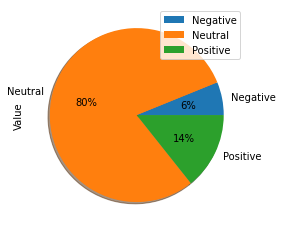

In [ ]:

df = pd.DataFrame({'Sentiment':['Positive','Negative','Neutral'],'Value':[x,y,z]})
df.groupby(['Sentiment']).sum().plot(kind='pie', y='Value', autopct='%1.0f%%',shadow = True)

### Word Cloud


In [ ]:
tknzr = TweetTokenizer()
final_df['Tokens'] = final_df['Tweet'].apply(tknzr.tokenize)

In [ ]:
final_df

,Tweet,Positive,Negative,Neutral,Tokens
0,have a read through 's csr report and how the ...,0.000,0.121,0.879,"[have, a, read, through, ', s, csr, report, an..."
1,so what happened to their multi-trillion d...,0.225,0.000,0.775,"[so, what, happened, to, their, multi-trillion..."
2,'resilience nsw' not inspired by the formerly...,0.000,0.193,0.807,"[', resilience, nsw, ', not, inspired, by, the..."
3,'resilience nsw' let me guess inspired by the...,0.198,0.000,0.802,"[', resilience, nsw, ', let, me, guess, inspir..."
4,'resilience nsw' let me guess inspired by the...,0.198,0.000,0.802,"[', resilience, nsw, ', let, me, guess, inspir..."
...,...,...,...,...,...
297,if congress called for an investigation by th...,0.116,0.000,0.884,"[if, congress, called, for, an, investigation,..."
0,interesting news from the agm,0.403,0.000,0.597,"[interesting, news, from, the, agm]"
2,hope pat talks about the chevron loi time fra...,0.112,0.000,0.888,"[hope, pat, talks, about, the, chevron, loi, t..."
3,net-zero proposal gains significant support at...,0.580,0.000,0.420,"[net-zero, proposal, gains, significant, suppo..."


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud

In [ ]:
word_cloud = WordCloud(collocations=False,background_color = 'white').generate(str(final_df.Tokens))

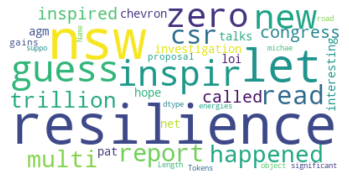

In [ ]:
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()